In [59]:
import pandas as pd
import datetime
import holidays

In [60]:
dati = pd.read_csv(r'Dati_PUN_17_19.csv', parse_dates = ['Data'])
sinusoidi = pd.read_csv(r'sinusoidi.csv')

In [61]:
dati['Giorno'] = dati['Data'].apply(lambda x: x.date().strftime('%A'))

In [62]:
iatly_holidays = holidays.Italy(years = [2017, 2018, 2019])

In [63]:
def get_holiday(row):
    row = row.date()
    iatly_holidays = holidays.Italy(years = [2017, 2018, 2019])
    if row in iatly_holidays:
        return(1)
    else:
        return(0)    

In [64]:
dati['Giorno_Vacanza'] = dati['Data'].apply(get_holiday)

In [65]:
dati.head()

,Data,PUN,Giorno,Giorno_Vacanza
0,2017-01-01 00:00:00,53.30,Sunday,1
1,2017-01-01 01:00:00,52.00,Sunday,1
2,2017-01-01 02:00:00,51.00,Sunday,1
3,2017-01-01 03:00:00,47.27,Sunday,1
4,2017-01-01 04:00:00,45.49,Sunday,1


In [66]:
dati['Giorno_Vacanza'].value_counts()

0    28200
1      984
Name: Giorno_Vacanza, dtype: int64

Corretto poichè ci sonp 12 giorni festivi spalamati su 24 ore e 3 anni. Quindi 12 * 24 * 3 = 864

In [67]:
dummies = pd.get_dummies(dati['Giorno'])

In [68]:
frames = [dati, dummies, sinusoidi]

In [69]:
dati = pd.concat(frames, axis = 1)

In [70]:
dati = dati.drop(columns = ['Giorno'])

In [71]:
dati

,Data,PUN,Giorno_Vacanza,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,sinu365.23,sinu365.24,sinu365.25,sinu365.26,sinu365.27,sinu365.28,sinu365.29,sinu365.30,sinu365.31,sinu365.32
0,2017-01-01 00:00:00,53.30,1,0,0,0,1,0,0,0,...,0.248940,-0.160575,-0.543105,-0.834370,-0.985424,-0.970882,-0.793190,-0.482206,-0.090190,0.316982
1,2017-01-01 01:00:00,52.00,1,0,0,0,1,0,0,0,...,-0.482206,0.316982,0.912053,0.919817,0.335276,-0.465162,-0.966065,-0.844881,-0.179645,0.601271
2,2017-01-01 02:00:00,51.00,1,0,0,0,1,0,0,0,...,0.685111,-0.465162,-0.988531,-0.179645,0.871351,0.748017,-0.383428,-0.998123,-0.267636,0.823547
3,2017-01-01 03:00:00,47.27,1,0,0,0,1,0,0,0,...,-0.844881,0.601271,0.748017,-0.721775,-0.631740,0.823547,0.499069,-0.903946,-0.353445,0.960885
4,2017-01-01 04:00:00,45.49,1,0,0,0,1,0,0,0,...,0.951454,-0.721775,-0.267636,0.975336,-0.656411,-0.353445,0.991269,-0.585696,-0.436373,0.999121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,2020-04-30 19:00:00,31.00,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29180,2020-04-30 20:00:00,37.04,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29181,2020-04-30 21:00:00,29.80,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29182,2020-04-30 22:00:00,22.87,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
dati["df24"] = dati['PUN'].shift(24)

In [73]:
dati= dati.loc[dati['Data'] < '2020-01-01']

In [74]:
dati.index = pd.DatetimeIndex(dati.Data)


In [75]:
dati.drop('Data', axis=1, inplace=True)

C:\Users\mpich\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
mask_test = dati.index > "2019-12-24"
mask_train = dati.index <= "2019-12-24"

# %%
test = dati.loc[mask_test]
test

# %%
train = dati.loc[mask_train]
train



,PUN,Giorno_Vacanza,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,sinu365.1,...,sinu365.24,sinu365.25,sinu365.26,sinu365.27,sinu365.28,sinu365.29,sinu365.30,sinu365.31,sinu365.32,df24
Data,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,53.30,1,0,0,0,1,0,0,0,0.915978,...,-0.160575,-0.543105,-0.834370,-0.985424,-0.970882,-0.793190,-0.482206,-0.090190,0.316982,NaN
2017-01-01 01:00:00,52.00,1,0,0,0,1,0,0,0,0.678031,...,0.316982,0.912053,0.919817,0.335276,-0.465162,-0.966065,-0.844881,-0.179645,0.601271,NaN
2017-01-01 02:00:00,51.00,1,0,0,0,1,0,0,0,0.326144,...,-0.465162,-0.988531,-0.179645,0.871351,0.748017,-0.383428,-0.998123,-0.267636,0.823547,NaN
2017-01-01 03:00:00,47.27,1,0,0,0,1,0,0,0,-0.080549,...,0.601271,0.748017,-0.721775,-0.631740,0.823547,0.499069,-0.903946,-0.353445,0.960885,NaN
2017-01-01 04:00:00,45.49,1,0,0,0,1,0,0,0,-0.473706,...,-0.721775,-0.267636,0.975336,-0.656411,-0.353445,0.991269,-0.585696,-0.436373,0.999121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 20:00:00,40.99,0,0,1,0,0,0,0,0,0.999667,...,0.204966,0.230151,0.255182,0.280044,0.304719,0.329192,0.353445,0.377462,0.401229,37.29
2019-12-23 21:00:00,36.90,0,0,1,0,0,0,0,0,0.905321,...,-0.359472,-0.721775,-0.947404,-0.993635,-0.851712,-0.548511,-0.141444,0.292406,0.670887,31.83
2019-12-23 22:00:00,31.96,0,0,1,0,0,0,0,0,0.658840,...,0.504648,0.981947,0.789245,0.058026,-0.712786,-0.997250,-0.601271,0.204966,0.871351,28.01


In [77]:
X_train = train.drop("PUN", axis=1).values
X_train = X_train[24:]

# %%
X_test = test.drop("PUN", axis=1).values

# %%
y_train = train['PUN'][24:].values

# %%
y_test = test["PUN"].values

y_train


# %%
y_test.shape





(191,)

In [78]:
from sklearn.svm import SVR


# %%

svr_rbf = SVR(kernel='linear', C=5, gamma=1e-7, epsilon=1.5)


In [79]:
svr_rbf.fit(X_train, y_train)

predicted=svr_rbf.predict(X_test)
predicted_ = pd.DataFrame(predicted)
predicted_.head()


,0
0,13.588249
1,11.216599
2,10.003354
3,9.851129
4,10.996339


In [80]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()

# %%

y_test.head()

# %%

len(predicted)


# %%

results_vect = pd.concat([y_test, predicted_], axis=1)
results_vect.columns = ['Datetime', 'Target', 'Reg']

# %%
predicted_final = predicted_.shift(-24)
len(predicted_final)

# %%

results_vect = pd.concat([y_test, predicted_final], axis=1)

# %%
results_vect.columns = ['Datetime', 'Target', 'predicted_final']

results_vect['Target'].mean()

# %%



# %%

# plt.plot(results_vect[['Target', 'predicted_final']])
# plt.savefig('svrocco.png')

# %% 
# X_train = X_train.values
# y_train=y_train.values

#svc_pred = svr_rbf.predict(X_train)

# plt.figure()
# plt.plot(y_train, color = "red")
# plt.plot(svc_pred)

# np.mean(np.abs(((svc_pred-y_train)/y_train)))

# %%


# %%

results_vect['diff'] = abs(results_vect['Target'] - results_vect['predicted_final'])

results_vect['diff'].mean()


3.4312210465554367

In [81]:
results_vect['diff'] = (abs(results_vect['Target'] - results_vect['predicted_final'])/results_vect['Target'])

results_vect['diff'].mean()

0.1487571822465406

In [82]:
predicted

array([13.58824928, 11.21659887, 10.0033543 ,  9.85112885, 10.99633873,
       29.87404276, 40.12369235, 41.94491877, 41.55099788, 40.3559946 ,
       39.00171558, 37.6092448 , 36.03205779, 39.75677783, 41.64695426,
       47.4393144 , 51.75991521, 47.88382743, 46.92077748, 44.01158374,
       40.5989815 , 36.26921404, 24.95535541,  9.45685104,  7.5327784 ,
        5.93552464,  5.53241016,  5.87167924,  6.35098198, 20.80960956,
       31.71154324, 32.92587093, 33.49717576, 30.19195393, 29.55874633,
       29.43682655, 29.44094612, 33.65696716, 36.17892325, 42.95063802,
       45.60392253, 44.80769111, 44.37487629, 42.87949399, 34.91140679,
       27.08604088, 21.74928138, 15.60471918, 11.62589147, 11.401806  ,
       10.99869216, 11.53175983, 11.42329108, 11.57200925, 18.29341259,
       11.57493067, 11.67900626, 18.44273283, 15.46698833, 18.17929907,
       13.11794467, 12.82530684, 15.8016079 , 30.12641796, 39.24015767,
       39.82134659, 40.68278588, 39.8248383 , 40.35322994, 35.73

In [83]:
svc_pred = svr_rbf.predict(X_train)

11.327854425372855

5.840038938235232

In [88]:
svc_pred_ = pd.DataFrame(svc_pred)
predicted_.head()

,0
0,13.588249
1,11.216599
2,10.003354
3,9.851129
4,10.996339


In [89]:
y_train = train['PUN'][24:].values
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()

In [90]:
df5 = pd.concat([y_train, svc_pred_], axis=1)
df5 = ['Datetime', 'Target', 'Reg']

In [91]:
svc_final = svc_pred_.shift(-24)



In [92]:
df5 = pd.concat([y_train, svc_final], axis=1)

# %%
df5.columns = ['Datetime', 'Target', 'predicted_final']

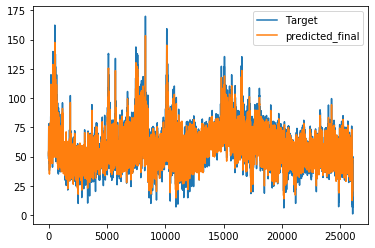

In [93]:
df5[['Target', 'predicted_final']].plot()

In [94]:
df5['diff'] = abs(df5['Target'] - df5['predicted_final'])

df5['diff'].mean()


3.3462027015443194

In [95]:
df5['diff'] = (abs(df5['Target'] - df5['predicted_final'])/df5['Target'])

df5['diff'].mean()

0.06595811732953434